In [1]:
import tensorflow as tf
print(tf.__version__)

0.11.0


In [2]:
%matplotlib inline
import numpy.ma as ma
from numpy import isfinite



import numpy as np
from matplotlib import pyplot as plt
#from tensorflow.nn.rnn import *
from tensorflow.python.ops  import *

%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.framework import dtypes

import seaborn as sns

In [4]:
cd /

/


In [5]:
cd Users/Seychelles/Desktop/GoogleTensorflow/Data_Collector/CSV_file_from_2007_to_2017/

/Users/Seychelles/Desktop/GoogleTensorflow/Data_Collector/CSV_file_from_2007_to_2017


In [6]:
DataKarpos = pd.read_csv('Target.csv') # Only Karpos Location is used here . Other locations are zero

In [7]:
print ("Number of columns present : ");DataKarpos.columns.values.size

Number of columns present : 


27

In [8]:
DataKarpos.columns

Index(['Unnamed: 0', 'date', 'PM10', 'NAME', 'PM10_null_pointers', 'CO',
       'CO_null_pointers', 'NO2', 'NO2_null_pointers', 'O3',
       'O3_null_pointers', 'PM25', 'PM25_null_pointers', 'time', 'month',
       'day', 'hour', 'daysInterval', 'days_interval', 'hour_interval',
       'Centar', 'Gazi Baba', 'Karpos', 'Lisice', 'Miladinovci', 'Mrsevci',
       'Rektorat'],
      dtype='object')

In [9]:
DataKarpos.describe() # Describe data input 

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Unnamed: 0,PM10,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers,PM25,...,hour,days_interval,hour_interval,Centar,Gazi Baba,Karpos,Lisice,Miladinovci,Mrsevci,Rektorat
count,89500.000000,60629.000000,89500.000000,57342.000000,89500.000000,42360.000000,89500.000000,50553.000000,89500.000000,36143.000000,...,89500.000000,89500.0,89500.000000,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0
mean,313249.476067,-0.450405,0.677419,-0.126302,0.640693,-0.025275,0.473296,0.164331,0.564838,0.066891,...,11.502346,0.0,0.096425,0.0,0.0,1.0,0.0,0.0,0.0,0.0
std,180855.980629,0.746962,0.467467,0.481382,0.479800,0.601696,0.499289,1.059082,0.495781,1.096480,...,6.921202,0.0,0.295174,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,7.000000,-2.593269,0.000000,-0.465316,0.000000,-0.775219,0.000000,-1.071914,0.000000,-0.860290,...,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,156623.250000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,...,6.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50%,313248.000000,NaN,1.000000,NaN,1.000000,NaN,0.000000,NaN,1.000000,NaN,...,12.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
75%,469873.500000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,...,18.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
max,626496.000000,2.934737,1.000000,4.243175,1.000000,9.176899,1.000000,9.258671,1.000000,11.020234,...,23.000000,0.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
DataKarpos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89500 entries, 0 to 89499
Data columns (total 27 columns):
Unnamed: 0            89500 non-null int64
date                  89500 non-null object
PM10                  60629 non-null float64
NAME                  89500 non-null object
PM10_null_pointers    89500 non-null int64
CO                    57342 non-null float64
CO_null_pointers      89500 non-null int64
NO2                   42360 non-null float64
NO2_null_pointers     89500 non-null int64
O3                    50553 non-null float64
O3_null_pointers      89500 non-null int64
PM25                  36143 non-null float64
PM25_null_pointers    89500 non-null int64
time                  89500 non-null object
month                 89500 non-null int64
day                   89500 non-null int64
hour                  89500 non-null int64
daysInterval          89500 non-null object
days_interval         89500 non-null int64
hour_interval         89500 non-null int64
Centar           

## Extract Data And Feature set

In [11]:
TargetKarpos = DataKarpos[['PM10']].copy(deep=True) # copy PM10 data out from data sets

In [12]:
features_set = DataKarpos.copy(deep=True)

In [13]:
del features_set['PM10'] # delete feature set  from data set

In [14]:
features_set.drop(['Unnamed: 0','date','day', 'time','Lisice', 'Miladinovci', 'Mrsevci',
       'Rektorat','daysInterval','NAME', 'hour_interval', 'days_interval','Centar', 'Gazi Baba'],axis=1,inplace=True)

In [15]:
print ("Number of columns present in Future set : ");features_set.columns.values.size

Number of columns present in Future set : 


12

In [16]:
features_set.columns

Index(['PM10_null_pointers', 'CO', 'CO_null_pointers', 'NO2',
       'NO2_null_pointers', 'O3', 'O3_null_pointers', 'PM25',
       'PM25_null_pointers', 'month', 'hour', 'Karpos'],
      dtype='object')

In [17]:
features_set[1:5] # Our feature set now comes out neat.

,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers,PM25,PM25_null_pointers,month,hour,Karpos
1,1,0.332930,1,NaN,0,-0.094688,1,NaN,0,1,0,1.0
2,1,0.118908,1,NaN,0,-0.076718,1,NaN,0,1,1,1.0
3,1,0.118908,1,NaN,0,-0.076718,1,NaN,0,1,1,1.0
4,1,-0.031487,1,NaN,0,-0.030862,1,NaN,0,1,2,1.0


# Analysis Of Mising Values For PM10

In [18]:
Target = DataKarpos[['PM10']].copy(deep=True)

In [19]:
Target.shape

(89500, 1)

In [20]:
null_data_PM10 = Target[Target.isnull().any(axis=1)] # extract data sets with null values

In [21]:
null_data_PM10.describe()

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PM10
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [22]:
null_data_PM10.info() # Info about  non-null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28871 entries, 168 to 86692
Data columns (total 1 columns):
PM10    0 non-null float64
dtypes: float64(1)
memory usage: 451.1 KB


In [23]:
Target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89500 entries, 0 to 89499
Data columns (total 1 columns):
PM10    60629 non-null float64
dtypes: float64(1)
memory usage: 699.3 KB


In [24]:
Target.describe()

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PM10
count,60629.000000
mean,-0.450405
std,0.746962
min,-2.593269
25%,NaN
50%,NaN
75%,NaN
max,2.934737


In [25]:
def getPctMissing(series):
    '''
    Returns percentage of Missing data in a data set.
    Input : Pandas series
    Output: Percentage of missing data in data set
    '''
    num = series.isnull().sum()
    Total_data = len(series)
    return 100*(num/Total_data)

In [26]:
print("Number of null values in PM10 : ");Target.isnull().sum()

Number of null values in PM10 : 


PM10    28871
dtype: int64

In [27]:
print("Number of non null values in PM10 : ");Target.count()

Number of non null values in PM10 : 


PM10    60629
dtype: int64

In [28]:
print("Percentage of Missing Value: "); getPctMissing(Target)

Percentage of Missing Value: 


PM10    32.258101
dtype: float64

# Data After Cleaning

In [29]:
Target.describe()

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PM10
count,60629.000000
mean,-0.450405
std,0.746962
min,-2.593269
25%,NaN
50%,NaN
75%,NaN
max,2.934737


In [30]:
Target = Target.reset_index(drop=True)

In [31]:
Target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89500 entries, 0 to 89499
Data columns (total 1 columns):
PM10    60629 non-null float64
dtypes: float64(1)
memory usage: 699.3 KB


In [32]:
print("Number of null values in PM10 : ");Target.isnull().sum()

Number of null values in PM10 : 


PM10    28871
dtype: int64

In [33]:
print("Number of non null values in PM10 : ");Target.count()

Number of non null values in PM10 : 


PM10    60629
dtype: int64

In [34]:
Target.head()

,PM10
0,0.655947
1,0.655947
2,0.325387
3,0.325387
4,0.159634


# Clean data

In [35]:
Target.drop(Target.index[168:215],inplace=True);# 16 consecutive entries missing
Target.drop(Target.index[337:361],inplace=True);# 
Target.drop(Target.index[961:984],inplace=True);
Target.drop(Target.index[1082:1105],inplace=True)
Target.drop(Target.index[1088:1106],inplace=True)
Target.drop(Target.index[1569:1593],inplace=True)
Target.drop(Target.index[1689:1705],inplace=True)
Target.drop(Target.index[2272:2296],inplace=True)
Target.drop(Target.index[3470:3592],inplace=True)
Target.drop(Target.index[16707:35423],inplace=True)

In [36]:
features_set.drop(features_set.index[168:215],inplace=True);# 16 consecutive entries missin
features_set.drop(features_set.index[337:361],inplace=True);# 
features_set.drop(features_set.index[961:984],inplace=True);
features_set.drop(features_set.index[1082:1105],inplace=True)
features_set.drop(features_set.index[1088:1106],inplace=True)
features_set.drop(features_set.index[1569:1593],inplace=True)
features_set.drop(features_set.index[1689:1705],inplace=True)
features_set.drop(features_set.index[2272:2296],inplace=True)
features_set.drop(features_set.index[3470:3592],inplace=True)
features_set.drop(features_set.index[16707:35423],inplace=True)

In [37]:
# Reset index
Target = Target.reset_index(drop=True)
features_set = features_set.reset_index(drop=True)

In [38]:
print("Number of null values in PM10 : ");Target.isnull().sum()

Number of null values in PM10 : 


PM10    10098
dtype: int64

In [39]:
print("Percentage of Missing Value After cleaning: "); getPctMissing(Target)

Percentage of Missing Value After cleaning: 


PM10    14.330925
dtype: float64

# Prepare Data 

In [40]:
column_size = features_set.columns.values.size # this is size of list element size
Target_list = Target.values.tolist() # create a list of values for use in data model
feature_list= features_set.values.tolist()

In [41]:
counter=0 # for tracking each input of target
def dataGetter(datalist):
    """
    Function for moving the sliding window across the target
    Appends a taget variable on each call.
    
    Returns a single PM10 value.
    Input: PM10 Data list named Target_list above
    Output: single PM10 value
    """
    global counter;
    assert type(datalist) == list;
    
    
    value = datalist[counter]
    #print(counter)


    counter = counter +1
             
    return np.array([value])

In [42]:
counter_t=0 # for tracking each input of feature set
def dataGetter_target(datalist):
    """
    Function move sliding window across the feature set
    Appends a new feature set on each call
    
    Input: Feature set  Data list named Feature_list above
    Output: single PM10 value
    """
    global counter_t;
    assert type(datalist) == list;
    
    
    value = datalist[counter_t]
    #print(counter)


    counter_t = counter_t +1
             
    return np.array([value])

In [43]:
# Define window size or learning
sliding_window = []
lag=25 # 24 hours time step from 0 to 24 plus the window_step_move (25) which is to be predicted
window_move_step = 1
for i in range(lag - window_move_step):
    sliding_window.append(dataGetter(Target_list))

In [44]:
# sliding window for feature set 

sliding_window_featureset = []
lag=25 # 24 hours time step from 0 to 24 plus the window_step_move (25) which is to be predicted
window_move_step = 1
for i in range(lag - window_move_step):
    sliding_window_featureset.append(dataGetter_target(feature_list))

In [45]:
def get_pair(Target,Target2):
    """
    Function for moving the slifing window.
    It calls datagetter and dataGetter_target seperately to 
    get the feature set and target separately.
    
    At each call it drops the the first element in 
    the feature set.
    
    In the target, it only uses the 25th value since the aim 
    is to predict the 25th value given the past feature set for the last 24 hours.
    
    
    
    """
 
    global sliding_window # sliding window for target 
    global sliding_window_featureset # Sliding window feature set
    sliding_window.append(dataGetter(Target)) 
    #print(len(sliding_window))
    sliding_window_featureset.append(dataGetter_target(Target2))
    
    input_value = sliding_window_featureset[0:24]
    
    
    input_value=np.array(input_value)
    
    #print(input_value.shape)
    input_value=np.reshape(input_value,(1,len(input_value)*column_size))
    mx = np.ma.masked_invalid(input_value)
    
    ##print(input_value)
    output_value = sliding_window[-1]
    my = np.ma.masked_invalid(output_value)
    ####remove last value from sliding_window
    _ = sliding_window_featureset[-1]
    ##print(output_value)
    sliding_window = sliding_window[1:]
    sliding_window_featureset = sliding_window_featureset[1:]
    #print(len(sliding_window))
    # Process output
    mask_x = ~mx.mask
    mask_float = mask_x
    ## y output
    mask_y =~my.mask
    mask_yfloat = mask_y
    return mx.data,mask_x.astype(float), my.data,mask_y.astype(float)

# Build Model

In [46]:
#Imports
import tensorflow as tf
#from tensorflow.nn.rnn import *
from tensorflow.python.ops  import *


In [47]:
#Input Params
NUMBER=0; # replacement for nan
with tf.name_scope("input_target_placeholders"):    
    input_dim = 1
    ##The Input Layer as a Placeholder
    #Since we will provide data sequentially, the 'batch size'
    #is 1.
    input_layer = tf.placeholder(tf.float32, [1, input_dim*288],name="input_data")
    correct_output = tf.placeholder(tf.float32, [1, input_dim],name="target_data")
    mask_x = tf.placeholder(tf.float32, [1, input_dim*288],name="inputmask")
    mask_y = tf.placeholder(tf.float32, [1, input_dim],name="target_mask")
    features_with_nans = tf.mul(input_layer, mask_x)
    y_input_with_nans = tf.mul(mask_y,correct_output)
    y_input = tf.select(tf.is_nan(y_input_with_nans), tf.ones_like(y_input_with_nans) * NUMBER, y_input_with_nans);
    features = tf.select(tf.is_nan(features_with_nans), tf.ones_like(features_with_nans) * NUMBER, features_with_nans);

In [48]:
###inistate = tf.Variable(lstm_cell_with_dropout.zero_state(BATCH_SIZE, tf.float32), trainable=False)

In [49]:
with tf.name_scope("lstmLayer"):    
    lstm_layer1 = rnn_cell.BasicLSTMCell(input_dim*288,state_is_tuple=False)
    #The LSTM state as a Variable initialized to zeroes
    lstm_state1 = tf.Variable(tf.zeros([1, lstm_layer1.state_size]),trainable=False,name="initial_state")
    #lstm_state1 = tf.Variable(lstm_layer1.zero_state(1,lstm_layer1.state_size[-1] ), trainable=False)
    #Connect the input layer and initial LSTM state to the LSTM cell
    lstm_output1, lstm_state_output1 = lstm_layer1(features, lstm_state1)
    #The LSTM state will get updated
    lstm_update_op1 = lstm_state1.assign(lstm_state_output1)

In [50]:
lstm_state_output1.get_shape() # verify shape

TensorShape([Dimension(1), Dimension(576)])

In [131]:
with tf.name_scope("weight_Bias_learning_rate"):
    global_step = tf.Variable(0, trainable=False,name="global_step")
    starter_learning_rate = 0.009
    learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                           1000, 0.8, staircase=False,name ="Exponential_decay")
    ##The Regression-Output Layer
    #The Weights and Biases matrices first
    output_W1 = tf.Variable(tf.truncated_normal([input_dim,input_dim*288]),name="weight")
    output_b1 = tf.Variable(tf.zeros([input_dim]),name="bias")
    selector=tf.mul(mask_x,output_W1)
    selector_2 = tf.transpose(selector)
    

In [132]:
with tf.name_scope("prediction"):
    #Compute the output
    
    final_output = tf.matmul(lstm_output1, selector_2) + output_b1

In [133]:
lambda_l2_reg=0.2
l2 = lambda_l2_reg * sum(
    tf.nn.l2_loss(tf_var)
        for tf_var in tf.trainable_variables()
        if not ("noreg" in tf_var.name or "bias" in tf_var.name)
)
#loss += l2

In [134]:
final_output.get_shape() # verify output shape

TensorShape([Dimension(1), Dimension(1)])

In [135]:
output_W1 # verify weight shape

In [136]:
with tf.name_scope("RMS_error"):
    ##Calculate the Sum-of-Squares Error
    
    error = tf.pow(tf.sub(final_output,y_input), 2)+l2

In [137]:
with tf.name_scope("optimizer"):
    ##The Optimizer
    #Adam works best
    train_step = tf.train.AdamOptimizer(learning_rate).minimize(error)

In [138]:
# Create a summary to monitor MSE
mse=tf.summary.tensor_summary("errors_Summary",error)
# Create a summary to monitor  predictions
prediction=tf.summary.tensor_summary("predictions_Summmary", final_output)
# Create a summary to monitor bias
bias_vec=tf.summary.tensor_summary("bias", output_b1)
# create sumary
#rate_vec=tf.summary.scalar("rate", learning_rate)


#histogram plot

error_stats=tf.histogram_summary("errors_Histogram",error)
weight_stats=tf.histogram_summary("weights_Histogram",output_W1)
bias_stats=tf.histogram_summary("biases_Histogram",output_b1)
#learning_stats=tf.histogram_summary("biases_Histogram",learning_rate)


#merged_summary_op =  tf.merge_all_summaries()
merged_summary_op =   tf.merge_summary([mse,prediction,bias_vec,error_stats,weight_stats,bias_stats])

In [139]:
##Session
sess = tf.Session()
#Initialize all Variables
sess.run(tf.initialize_all_variables())


# Evaluation Data set

In [140]:
logs_path = '/Users/Seychelles/Desktop/GoogleTensorflow/finals/tensorboardData/local_median/' # for tensorfboard

In [141]:
##Training Parameters
n_iter = 70415
inner_iter = 6000
actual_output1 = []
network_output1 = []


In [142]:
len(Target_list)

70463

# Feature and target Validation and test set

In [143]:
import copy
#new_list = copy.deepcopy(old_list)
Test_eval=copy.deepcopy(Target_list[n_iter:])

In [144]:
Feature_eval=copy.deepcopy(feature_list[n_iter:]) # copy out feature set for validation

In [145]:
len(Feature_eval)

48

In [146]:
len(Test_eval)

48

# Errors Plot

In [147]:
writer = tf.train.SummaryWriter(logs_path, graph= tf.get_default_graph())

In [148]:
init = tf.initialize_all_variables()
error_=[]

sess.run(init)
counter =0 
counter_t=0
assert counter==0

for i in range(n_iter):
    input_v,input_mask ,output_v,output_mask = get_pair(Target_list,feature_list)
    y_inputz = sess.run([y_input],feed_dict={correct_output: output_v,mask_y:output_mask})
        
    #print(input_v.shape)
    #print (dtype(input_v))
    #print(input_mask.shape)
    #print(output_mask.shape)
    #print(output_v.shape)
    _, _, network_output,errors,summary = sess.run([lstm_update_op1,
                                     train_step,
                                     final_output,error,merged_summary_op],
                                    feed_dict = {
                                        input_layer:input_v,mask_x:input_mask,
                                        correct_output: output_v,mask_y:output_mask})
    writer.add_summary(summary)
    error_.append(errors)
    if i%inner_iter==0 & i!=0:
           assert i!=0;
            # reset state
            # Every once in a while we reset the initial state to zero.
            # This is to facilitate learning and prevent overfitting.
            # The model has been initially configured to propagate previous state to the initial 
            # state in the next iteration. 
           sess.run(lstm_state1.assign(tf.zeros([1, lstm_layer1.state_size])))
        
    actual_output1.append(y_inputz)
        #actual_output2.append(output_v[0][1])
    network_output1.append(network_output)
        #network_output2.append(network_output[0][1])
        #x_axis.append(i)
                

In [149]:
errorplot = np.array(error_)
errorplot = errorplot.reshape(n_iter,1)

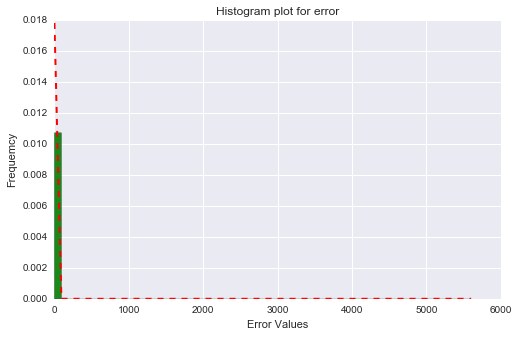

In [150]:
import matplotlib.mlab as mlab

#fig, ax = plt.subplots()
n, bins, patches=plt.hist(errorplot,60,normed=1,facecolor='green',alpha=0.9)
mu= np.mean(errorplot);sigma=np.std(errorplot);
y = mlab.normpdf( bins,mu,sigma)
#y = mlab.normpdf( bins, mu, sigma)
plt.plot(bins, y, 'r--', linewidth=2)
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.title("Histogram plot for error")
plt.ylabel("Frequemcy")
plt.xlabel("Error Values")
plt.show()

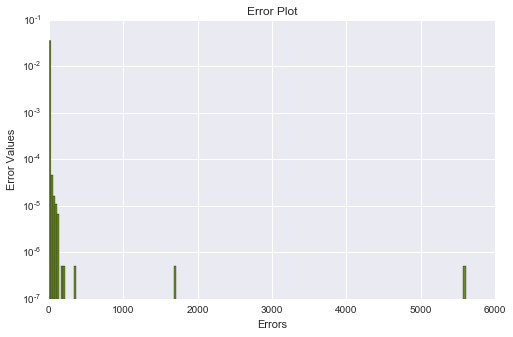

In [151]:
import matplotlib.mlab as mlab

fig, ax = plt.subplots()
plt.hist(errorplot,bins=200,normed=1,facecolor='olivedrab')

ax.set_yscale('log')
#ax.set_xscale('log')
plt.title("Error Plot")
plt.ylabel("Error Values")
plt.xlabel("Errors")
plt.show()

# Training Prediction plot

In [152]:
from matplotlib.dates  import  date2num
Data = pd.read_csv('ItemListWithDummy.csv')

In [153]:
pd.to_datetime(Data.date);

In [154]:
x_axis = Data['date']

In [155]:
x_axis = pd.to_datetime(x_axis)

In [156]:
#80000-len(network_output1)

In [157]:
network = np.array(network_output1) # convert out put to 

In [158]:
actual= np.array(actual_output1)

In [159]:
actual.shape[0]

70415

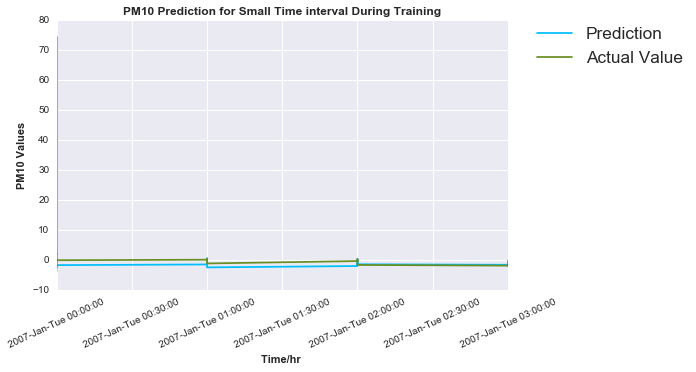

In [160]:
import  matplotlib
plt.rcParams["figure.figsize"] = (8,5)
fig = plt.figure(figsize=(30, 2))

fig, ax = plt.subplots()
ax.plot(x_axis[0:48], network.reshape(actual.shape[0],1)[0:48], 'r-',color='deepskyblue',label= 'Prediction')
ax.plot_date(x_axis[0:48], actual.reshape(actual.shape[0],1)[0:48], 'b-',color='olivedrab',label='Actual Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='x-large')
#ax.xaxis.set_minor_locator(dates.MonthLocator())
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.xaxis.grid(True, which="minor")
#ax.yaxis.grid()
#ax.xaxis.set_major_locator(dates.DayLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
ax.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%Y-%b-%a %H:%M:%S'))
ax.xaxis.grid(True, which="minor")

#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))


plt.xticks( rotation=25 )
plt.tight_layout()
plt.ylabel("PM10 Values",fontweight='bold')
plt.xlabel("Time/hr ",fontweight='bold')
plt.title("PM10 Prediction for Small Time interval During Training",fontweight='bold')
plt.show()

# Plots predictions during Training

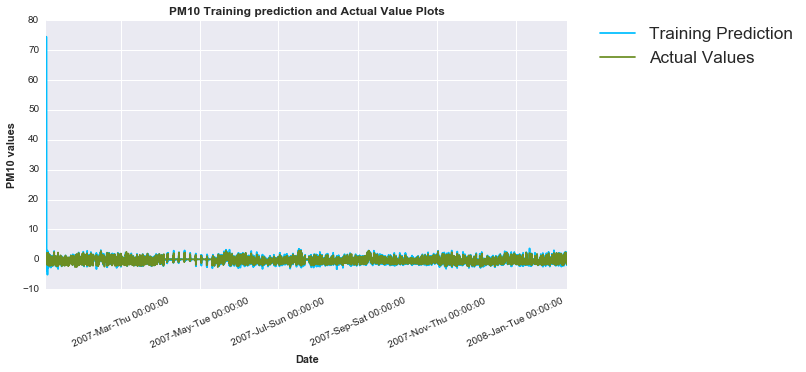

In [161]:
fig = plt.figure(figsize=(30, 2))

fig, ax = plt.subplots()
ax.plot(x_axis[0:actual.shape[0]], network.reshape(actual.shape[0],1)[0:actual.shape[0]], 'r-',color='deepskyblue',label='Training Prediction')
ax.plot_date(x_axis[0:actual.shape[0]], actual.reshape(actual.shape[0],1)[0:actual.shape[0]], 'b-',color='olivedrab',label='Actual Values')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='x-large')
#ax.xaxis.set_minor_locator(dates.MonthLocator())
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.xaxis.grid(True, which="minor")
#ax.yaxis.grid()
#ax.xaxis.set_major_locator(dates.DayLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
ax.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%Y-%b-%a %H:%M:%S'))
ax.xaxis.grid(True, which="minor")

#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))


plt.xticks( rotation=25 )
plt.tight_layout()
plt.ylabel("PM10 values",fontweight='bold')
plt.xlabel('Date', fontweight='bold')
plt.title("PM10 Training prediction and Actual Value Plots",fontweight='bold')
plt.show()

# Prediction

In [162]:
sess.run(lstm_state1.assign(tf.zeros([1, lstm_layer1.state_size])));

In [163]:
Target_list[-48:-24];

In [164]:
# Testing plot
counter =0 # reset the counter for target
counter_t=0 # reset the counter for feature lis
actual_output_test = []
network_output_test = []

 
for i in range(len(Test_eval[-48:-24])):
   
    input_v,input_mask ,output_v,output_mask = get_pair(Target_list[-48:-24],Feature_eval[-48:-24])
    y_inputz_test = sess.run([y_input],feed_dict={correct_output: output_v,mask_y:output_mask})
    _, network_output = sess.run([lstm_update_op1,
                                  final_output],
                                 feed_dict = {
                                     input_layer:input_v,mask_x:input_mask,
                                     correct_output: output_v})
        
 
    actual_output_test.append(y_inputz_test)
   
    network_output_test.append(network_output)
 

In [172]:
4+5

9

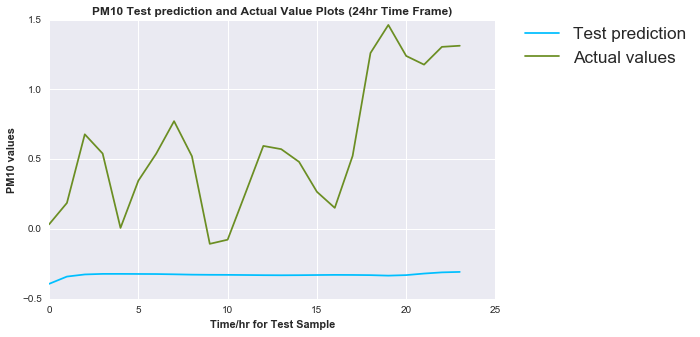

In [169]:
import matplotlib.pyplot 


fig = plt.figure(figsize=(30, 2))

fig, ax = plt.subplots()
ax.plot( np.array(network_output_test).reshape(len(network_output_test),1), 'r-',color='deepskyblue',label="Test prediction")
ax.plot(np.array(Target_list[-24:]).reshape(len(Target_list[-24:]),1), 'b-',color='olivedrab',label="Actual values")

#ax.xaxis.set_minor_locator(dates.MonthLocator())
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.xaxis.grid(True, which="minor")
#ax.yaxis.grid()
#ax.xaxis.set_major_locator(dates.DayLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
#ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%b-%a %H:%M:%S'))
#ax.xaxis.grid(True, which="minor")
plt.title("PM10 Test prediction and Actual Value Plots (24hr Time Frame)",fontweight='bold')
#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
plt.ylabel("PM10 values",fontweight='bold')
plt.xlabel("Time/hr for Test Sample",fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='x-large')


#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))


#plt.xticks( rotation=25 )
#plt.tight_layout()

plt.show()

In [166]:
from sklearn.metrics import mean_squared_error

In [167]:
mean_squared_error(np.array(network_output_test).reshape(len(network_output_test),1), np.array(Target_list[-24:]).reshape(len(Target_list[-24:]),1))**0.5  

1.026039093314987

In [168]:
import scipy
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

In [170]:
import scipy
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

In [171]:
rsquared(np.array(network_output_test).reshape(len(Target_list[-24:]),),
         np.array(Target_list[-24:]).reshape(len(network_output_test),) ) 

0.13614876217844332

In [129]:
actual_output_test = np.array(actual_output_test)

ValueError: total size of new array must be unchanged

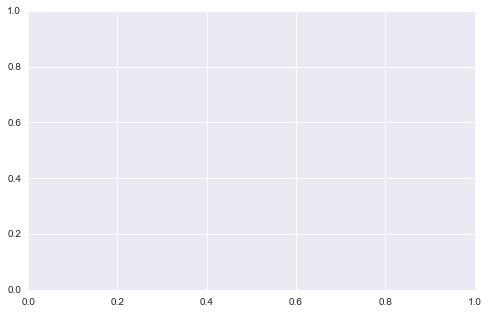

In [130]:
import matplotlib.pyplot 


fig = plt.figure(figsize=(30, 2))

fig, ax = plt.subplots()
ax.plot( actual_output_test.reshape(48,1), 'b-')
#ax.xaxis.set_minor_locator(dates.MonthLocator())
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.xaxis.grid(True, which="minor")
#ax.yaxis.grid()
#ax.xaxis.set_major_locator(dates.DayLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
#ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%b-%a %H:%M:%S'))
#ax.xaxis.grid(True, which="minor")



#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))


#plt.xticks( rotation=25 )
#plt.tight_layout()

plt.show()

In [ ]:
import matplotlib.pyplot 


fig = plt.figure(figsize=(30, 2))

fig, ax = plt.subplots()
ax.plot( network_output_test.reshape(48,1), 'r-')
#ax.xaxis.set_minor_locator(dates.MonthLocator())
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.xaxis.grid(True, which="minor")
#ax.yaxis.grid()
#ax.xaxis.set_major_locator(dates.DayLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
#ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%b-%a %H:%M:%S'))
#ax.xaxis.grid(True, which="minor")



#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))


#plt.xticks( rotation=25 )
#plt.tight_layout()

plt.show()